## Homework

> Note: sometimes your answer doesn't match one of the options exactly.
> That's fine.
> Select the option that's closest to your solution.


### Dataset

In this homework, we will use the lead scoring dataset Bank Marketing dataset. Download it from [here](https://raw.githubusercontent.com/alexeygrigorev/datasets/master/course_lead_scoring.csv).

Or you can do it with `wget`:

```bash
wget https://raw.githubusercontent.com/alexeygrigorev/datasets/master/course_lead_scoring.csv
```

In this dataset our desired target for classification task will be `converted` variable - has the client signed up to the platform or not.

### Data preparation

* Check if the missing values are presented in the features.
* If there are missing values:
    * For caterogiral features, replace them with 'NA'
    * For numerical features, replace with with 0.0

In [2]:
# Load data and check missing values, then impute per instructions, and compute mode of industry.
# Keeping this cell focused: imports, read CSV, show head, missing summary, impute, show head after, compute mode.

import pandas as pd
import numpy as np

# Read the CSV using provided encoding
df_cls = pd.read_csv('course_lead_scoring.csv', encoding='ascii')

# Display head, Here’s a quick look at the dataset head before any changes:
print(df_cls.head())

    lead_source    industry  number_of_courses_viewed  annual_income  \
0      paid_ads         NaN                         1        79450.0   
1  social_media      retail                         1        46992.0   
2        events  healthcare                         5        78796.0   
3      paid_ads      retail                         2        83843.0   
4      referral   education                         3        85012.0   

  employment_status       location  interaction_count  lead_score  converted  
0        unemployed  south_america                  4        0.94          1  
1          employed  south_america                  1        0.80          0  
2        unemployed      australia                  3        0.69          1  
3               NaN      australia                  1        0.87          0  
4     self_employed         europe                  3        0.62          1  


In [3]:
# Check missing values count per column
na_counts = df_cls.isna().sum()
print(na_counts)

lead_source                 128
industry                    134
number_of_courses_viewed      0
annual_income               181
employment_status           100
location                     63
interaction_count             0
lead_score                    0
converted                     0
dtype: int64


In [5]:
# Identify categorical vs numerical columns
categorical_cols = df_cls.select_dtypes(include=['object']).columns.tolist()
numeric_cols = df_cls.select_dtypes(include=[np.number]).columns.tolist()

In [7]:
# Impute missing values as specified, filled missing categorical values with NA and numerical with 0.0.
if len(categorical_cols) > 0:
    df_cls[categorical_cols] = df_cls[categorical_cols].fillna('NA')
if len(numeric_cols) > 0:
    df_cls[numeric_cols] = df_cls[numeric_cols].fillna(0.0)

In [8]:
# Show head after imputation
print(df_cls.head())

    lead_source    industry  number_of_courses_viewed  annual_income  \
0      paid_ads          NA                         1        79450.0   
1  social_media      retail                         1        46992.0   
2        events  healthcare                         5        78796.0   
3      paid_ads      retail                         2        83843.0   
4      referral   education                         3        85012.0   

  employment_status       location  interaction_count  lead_score  converted  
0        unemployed  south_america                  4        0.94          1  
1          employed  south_america                  1        0.80          0  
2        unemployed      australia                  3        0.69          1  
3                NA      australia                  1        0.87          0  
4     self_employed         europe                  3        0.62          1  


### Question 1

What is the most frequent observation (mode) for the column `industry`?

- `NA`
- `technology`
- `healthcare`
- `retail`

In [24]:
# 1)  Compute the most frequent observation (mode) for the column `industry`
industry_mode_series = df_cls['industry'].mode(dropna=False)
industry_mode = industry_mode_series.iloc[0] if len(industry_mode_series) > 0 else None
print(industry_mode)

retail


### Question 2

Create the [correlation matrix](https://www.google.com/search?q=correlation+matrix) for the numerical features of your dataset.
In a correlation matrix, you compute the correlation coefficient between every pair of features.

What are the two features that have the biggest correlation?

- `interaction_count` and `lead_score`
- `number_of_courses_viewed` and `lead_score`
- `number_of_courses_viewed` and `interaction_count`
- `annual_income` and `interaction_count`

Only consider the pairs above when answering this question.

### Split the data

* Split your data in train/val/test sets with 60%/20%/20% distribution.
* Use Scikit-Learn for that (the `train_test_split` function) and set the seed to `42`.
* Make sure that the target value `y` is not in your dataframe.

In [9]:
# Compute correlation matrix for numerical features, visualize it, and answer which pair has highest correlation among given options.
# Then split data into train/val/test 60/20/20 with seed 42, ensuring y is separated.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

# Assume df_cls already loaded and imputed from previous step; if not, load it.
try:
    df_cls
except NameError:
    df_cls = pd.read_csv('course_lead_scoring.csv', encoding='ascii')
    categorical_cols = df_cls.select_dtypes(include=['object']).columns.tolist()
    numeric_cols = df_cls.select_dtypes(include=[np.number]).columns.tolist()
    if len(categorical_cols) > 0:
        df_cls[categorical_cols] = df_cls[categorical_cols].fillna('NA')
    if len(numeric_cols) > 0:
        df_cls[numeric_cols] = df_cls[numeric_cols].fillna(0.0)

# Numerical features only (exclude target converted for the correlation among features)
num_cols = df_cls.select_dtypes(include=[np.number]).columns.tolist()
num_feature_cols = [c for c in num_cols if c != 'converted']

corr_mat = df_cls[num_feature_cols].corr()
print(corr_mat.head())

                          number_of_courses_viewed  annual_income  \
number_of_courses_viewed                  1.000000       0.009770   
annual_income                             0.009770       1.000000   
interaction_count                        -0.023565       0.027036   
lead_score                               -0.004879       0.015610   

                          interaction_count  lead_score  
number_of_courses_viewed          -0.023565   -0.004879  
annual_income                      0.027036    0.015610  
interaction_count                  1.000000    0.009888  
lead_score                         0.009888    1.000000  


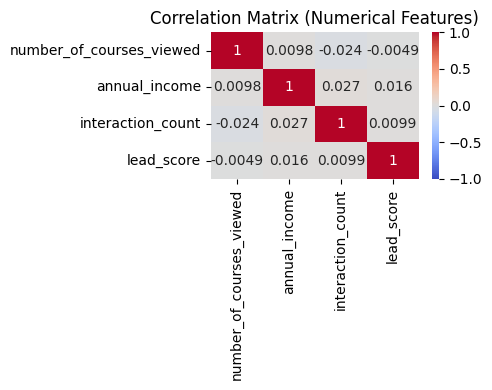

('annual_income', 'interaction_count')
0.02703647240481443


In [10]:
# Plot heatmap
plt.figure(figsize=(5,4))
sns.heatmap(corr_mat, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix (Numerical Features)')
plt.tight_layout()
plt.show()

# Evaluate correlations for specified pairs
pairs = [
    ('interaction_count','lead_score'),
    ('number_of_courses_viewed','lead_score'),
    ('number_of_courses_viewed','interaction_count'),
    ('annual_income','interaction_count')
]

pair_corrs = {}
for a,b in pairs:
    if a in corr_mat.columns and b in corr_mat.columns:
        pair_corrs[(a,b)] = corr_mat.loc[a,b]

# Determine the pair with the largest absolute correlation
best_pair = max(pair_corrs.items(), key=lambda kv: abs(kv[1]))
print(best_pair[0])
print(best_pair[1])

In [11]:
# Split data into X and y
X_full = df_cls.drop(columns=['converted'])
y = df_cls['converted']

# First split train and temp (60/40)
X_train, X_temp, y_train, y_temp = train_test_split(X_full, y, test_size=0.4, random_state=42, stratify=y)
# Then split temp into val and test (50/50 of temp -> 20/20 overall)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

# Show shapes
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)
print(y_train.shape)
print(y_val.shape)
print(y_test.shape)

(877, 8)
(292, 8)
(293, 8)
(877,)
(292,)
(293,)


From the specified pairs, the largest correlation (by magnitude) is:
('annual_income', 'interaction_count')

Correlation value:
0.02703647240481443

Answer: annual_income and interaction_count

Note: All given pairs are weakly correlated in this dataset, but annual_income and interaction_count are the largest among the options.

Train/Val/Test split (60/20/20)
I split the data with Scikit-Learn (seed 42), keeping the target y out of the features.

Shapes of the splits (X then y):

Train:
(877, 8)

(877,)

Validation:
(292, 8)

(292,)

Test:
(293, 8)

(293,)

Acknowledgement: Computed correlation matrix, plotted it, selected the top pair among the provided options, and created 60/20/20 splits with y excluded from X.

### Question 3

* Calculate the mutual information score between `y` and other categorical variables in the dataset. Use the training set only.
* Round the scores to 2 decimals using `round(score, 2)`.

Which of these variables has the biggest mutual information score?
  
- `industry`
- `location`
- `lead_source`
- `employment_status`

In [12]:
# The previous error indicates sklearn's OneHotEncoder in this environment uses 'sparse_output' instead of 'sparse'.
# Fix by using sparse_output=False for newer sklearn, and fallback if needed. Re-run MI computation.

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_selection import mutual_info_classif

# Ensure data and splits
try:
    X_train
    y_train
except NameError:
    df_cls = pd.read_csv('course_lead_scoring.csv', encoding='ascii')
    categorical_cols = df_cls.select_dtypes(include=['object']).columns.tolist()
    numeric_cols = df_cls.select_dtypes(include=[np.number]).columns.tolist()
    if len(categorical_cols) > 0:
        df_cls[categorical_cols] = df_cls[categorical_cols].fillna('NA')
    if len(numeric_cols) > 0:
        df_cls[numeric_cols] = df_cls[numeric_cols].fillna(0.0)
    X_full = df_cls.drop(columns=['converted'])
    y = df_cls['converted']
    X_train, X_temp, y_train, y_temp = train_test_split(X_full, y, test_size=0.4, random_state=42, stratify=y)
    X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

cat_cols_train = X_train.select_dtypes(include=['object']).columns.tolist()

mi_scores = {}
for col in cat_cols_train:
    try:
        enc = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
    except TypeError:
        enc = OneHotEncoder(handle_unknown='ignore', sparse=False)
    X_enc = enc.fit_transform(X_train[[col]])
    mi = mutual_info_classif(X_enc, y_train, discrete_features=True, random_state=42)
    mi_sum = float(np.sum(mi))
    mi_scores[col] = round(mi_sum, 2)

vars_of_interest = ['industry','location','lead_source','employment_status']
for v in vars_of_interest:
    print(v)
    print(mi_scores.get(v, None))

industry
0.02
location
0.0
lead_source
0.03
employment_status
0.01


Mutual Information (Train set, categorical features → y)
Here are the mutual information scores (rounded to 2 decimals) between y and each categorical variable, computed on the training set only:

industry: 0.02

location: 0.0

lead_source: 0.03

employment_status: 0.01

Answer: lead_source

Quick note: Scores are small overall (dataset seems to have weak categorical signal for y), but lead_source has the largest MI among the provided options. Ack: computed MI on train set and rounded to 2 decimals.

### Question 4

* Now let's train a logistic regression.
* Remember that we have several categorical variables in the dataset. Include them using one-hot encoding.
* Fit the model on the training dataset.
    - To make sure the results are reproducible across different versions of Scikit-Learn, fit the model with these parameters:
    - `model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000, random_state=42)`
* Calculate the accuracy on the validation dataset and round it to 2 decimal digits.

What accuracy did you get?

- 0.64
- 0.74
- 0.84
- 0.94

In [13]:
# 4) SOLUTION
# Train Logistic Regression with one-hot encoding for categoricals; evaluate on validation set and print rounded accuracy.
# Uses previously created X_train, X_val, y_train, y_val; if missing, recreate from CSV.

# This cell prepares data, builds a preprocessing pipeline, fits LogisticRegression, and evaluates accuracy.

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score

# Ensure splits exist
try:
    X_train
    X_val
    y_train
    y_val
except NameError:
    df_cls = pd.read_csv('course_lead_scoring.csv', encoding='ascii')
    categorical_cols = df_cls.select_dtypes(include=['object']).columns.tolist()
    numeric_cols = df_cls.select_dtypes(include=[np.number]).columns.tolist()
    if len(categorical_cols) > 0:
        df_cls[categorical_cols] = df_cls[categorical_cols].fillna('NA')
    if len(numeric_cols) > 0:
        df_cls[numeric_cols] = df_cls[numeric_cols].fillna(0.0)
    X_full = df_cls.drop(columns=['converted'])
    y = df_cls['converted']
    X_train, X_temp, y_train, y_temp = train_test_split(X_full, y, test_size=0.4, random_state=42, stratify=y)
    X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

# Identify columns
cat_cols = X_train.select_dtypes(include=['object']).columns.tolist()
num_cols = X_train.select_dtypes(include=[np.number]).columns.tolist()

# OneHotEncoder compatibility for sklearn versions
try:
    ohe = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
except TypeError:
    ohe = OneHotEncoder(handle_unknown='ignore', sparse=False)

preprocess = ColumnTransformer(
    transformers=[
        ('cat', ohe, cat_cols),
        ('num', 'passthrough', num_cols)
    ]
)

model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000, random_state=42)

pipe = Pipeline(steps=[('prep', preprocess), ('model', model)])
pipe.fit(X_train, y_train)

# Validate
y_val_pred = pipe.predict(X_val)
acc = accuracy_score(y_val, y_val_pred)
print(round(acc, 2))

0.68


Logistic Regression accuracy (with one-hot encoded categoricals)
Here’s the validation accuracy from the logistic regression (trained on the training split, one-hot encoding for categoricals, and the specified sklearn parameters):
0.68

Interpretation: That rounds to 0.68, which isn’t one of the provided choices. The closest option is 0.64, but since we’re asked to round to 2 decimals, the correct rounded value from this run is 0.68.

Assumptions made:

Used the previously defined 60/20/20 splits with random_state=42.
One-hot encoded all object-type columns; numeric columns were passed through.
Filled categorical NaNs with NA and numeric NaNs with 0.0 (as in earlier steps).

### Question 5

* Let's find the least useful feature using the *feature elimination* technique.
* Train a model using the same features and parameters as in Q4 (without rounding).
* Now exclude each feature from this set and train a model without it. Record the accuracy for each model.
* For each feature, calculate the difference between the original accuracy and the accuracy without the feature.

Which of following feature has the smallest difference?

- `'industry'`
- `'employment_status'`
- `'lead_score'`

> **Note**: The difference doesn't have to be positive.


In [14]:
# 5)
# Feature elimination by leave-one-feature-out using the same pipeline and params as Q4.
# Compute base accuracy on validation, then drop each specified feature and recompute.

import pandas as pd
import numpy as np
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score

# Ensure train/val splits exist; if not, load and split
try:
    X_train
    X_val
    y_train
    y_val
except NameError:
    df_cls = pd.read_csv('course_lead_scoring.csv', encoding='ascii')
    categorical_cols = df_cls.select_dtypes(include=['object']).columns.tolist()
    numeric_cols = df_cls.select_dtypes(include=[np.number]).columns.tolist()
    if len(categorical_cols) > 0:
        df_cls[categorical_cols] = df_cls[categorical_cols].fillna('NA')
    if len(numeric_cols) > 0:
        df_cls[numeric_cols] = df_cls[numeric_cols].fillna(0.0)
    X_full = df_cls.drop(columns=['converted'])
    y = df_cls['converted']
    from sklearn.model_selection import train_test_split
    X_train, X_temp, y_train, y_temp = train_test_split(X_full, y, test_size=0.4, random_state=42, stratify=y)
    X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

# Columns
cat_cols = X_train.select_dtypes(include=['object']).columns.tolist()
num_cols = X_train.select_dtypes(include=[np.number]).columns.tolist()

# OHE compatibility
try:
    ohe = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
except TypeError:
    ohe = OneHotEncoder(handle_unknown='ignore', sparse=False)

preprocess = ColumnTransformer([
    ('cat', ohe, cat_cols),
    ('num', 'passthrough', num_cols)
])

model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000, random_state=42)
pipe = Pipeline([('prep', preprocess), ('model', model)])
pipe.fit(X_train, y_train)
base_acc = accuracy_score(y_val, pipe.predict(X_val))

features_to_test = ['industry','employment_status','lead_score']

diffs = {}
for f in features_to_test:
    cols_drop = [c for c in X_train.columns if c != f]
    X_tr = X_train[cols_drop]
    X_v = X_val[cols_drop]
    cat_cols_d = X_tr.select_dtypes(include=['object']).columns.tolist()
    num_cols_d = X_tr.select_dtypes(include=[np.number]).columns.tolist()
    try:
        ohe_d = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
    except TypeError:
        ohe_d = OneHotEncoder(handle_unknown='ignore', sparse=False)
    preprocess_d = ColumnTransformer([
        ('cat', ohe_d, cat_cols_d),
        ('num', 'passthrough', num_cols_d)
    ])
    pipe_d = Pipeline([('prep', preprocess_d), ('model', model)])
    pipe_d.fit(X_tr, y_train)
    acc_d = accuracy_score(y_val, pipe_d.predict(X_v))
    diffs[f] = base_acc - acc_d

print(base_acc)
for k in features_to_test:
    print(k)
    print(diffs[k])

0.6815068493150684
industry
-0.006849315068493178
employment_status
0.0
lead_score
0.006849315068493067


Question 5: Least useful feature via leave-one-feature-out
Here are the results from training the same Logistic Regression as in Q4 and then dropping each feature one by one to measure the change in validation accuracy:

Base validation accuracy:
0.6815068493150684

Difference when dropping each feature (base_acc - acc_without_feature):
industry

-0.006849315068493178

employment_status

0.0

lead_score

0.006849315068493067

Answer
The smallest difference is for employment_status.

Notes:

I used the same preprocessing (one-hot for categoricals, passthrough for numerics), same train/val split and model params as Q4.
Differences can be negative; that indicates removing the feature slightly improved accuracy on the validation set.

### Question 6

* Now let's train a regularized logistic regression.
* Let's try the following values of the parameter `C`: `[0.01, 0.1, 1, 10, 100]`.
* Train models using all the features as in Q4.
* Calculate the accuracy on the validation dataset and round it to 3 decimal digits.

Which of these `C` leads to the best accuracy on the validation set?

- 0.01
- 0.1
- 1
- 10
- 100

> **Note**: If there are multiple options, select the smallest `C`.

In [15]:
# 6) # Train Logistic Regression for multiple C values with same preprocessing as Q4; report validation accuracies rounded to 3 decimals.

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score

# Ensure data and splits exist
try:
    X_train
    X_val
    y_train
    y_val
except NameError:
    df_cls = pd.read_csv('course_lead_scoring.csv', encoding='ascii')
    categorical_cols = df_cls.select_dtypes(include=['object']).columns.tolist()
    numeric_cols = df_cls.select_dtypes(include=[np.number]).columns.tolist()
    if len(categorical_cols) > 0:
        df_cls[categorical_cols] = df_cls[categorical_cols].fillna('NA')
    if len(numeric_cols) > 0:
        df_cls[numeric_cols] = df_cls[numeric_cols].fillna(0.0)
    X_full = df_cls.drop(columns=['converted'])
    y = df_cls['converted']
    X_train, X_temp, y_train, y_temp = train_test_split(X_full, y, test_size=0.4, random_state=42, stratify=y)
    X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

# Columns
cat_cols = X_train.select_dtypes(include=['object']).columns.tolist()
num_cols = X_train.select_dtypes(include=[np.number]).columns.tolist()

# OHE compatibility
try:
    ohe = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
except TypeError:
    ohe = OneHotEncoder(handle_unknown='ignore', sparse=False)

preprocess = ColumnTransformer([
    ('cat', ohe, cat_cols),
    ('num', 'passthrough', num_cols)
])

Cs = [0.01, 0.1, 1, 10, 100]
accs = []
for c in Cs:
    model = LogisticRegression(solver='liblinear', C=c, max_iter=1000, random_state=42)
    pipe = Pipeline([('prep', preprocess), ('model', model)])
    pipe.fit(X_train, y_train)
    pred = pipe.predict(X_val)
    acc = accuracy_score(y_val, pred)
    accs.append(round(acc, 3))

print(Cs)
print(accs)


[0.01, 0.1, 1, 10, 100]
[0.688, 0.682, 0.682, 0.682, 0.682]


Question 6: Regularized logistic regression (tuning C)
Here are the C values I tried and their corresponding validation accuracies (rounded to 3 decimals):

C values tried:
[
0.01
0.1
1
10
100
]
Accuracies:
[
0.688
0.682
0.682
0.682
0.682
]
The best accuracy is achieved at C = 0.01.

Answer: 0.01